In [8]:
import numpy as np
import pandas as pd
import scipy.io as sio
import scipy.optimize as opt
from sklearn.metrics import classification_report  #这个包是评价报告
import matplotlib.pyplot as plt

In [9]:
data_1=sio.loadmat('/Users/yangguangqiang/Music/career-2021/ML-startup/吴恩达/ML-homework-main/ex5-bias vs variance/ex5data1.mat')
train_x=data_1['X']
train_y=data_1['y']
test_x=data_1['Xtest']
test_y=data_1['ytest']
cv_x=data_1['Xval']
cv_y=data_1['yval']
print(train_x.shape,test_x.shape,cv_x.shape)
print(train_y.shape,test_y.shape,cv_y.shape)

(12, 1) (21, 1) (21, 1)
(12, 1) (21, 1) (21, 1)


In [11]:
(train_x)

array([[-15.93675813],
       [-29.15297922],
       [ 36.18954863],
       [ 37.49218733],
       [-48.05882945],
       [ -8.94145794],
       [ 15.30779289],
       [-34.70626581],
       [  1.38915437],
       [-44.38375985],
       [  7.01350208],
       [ 22.76274892]])

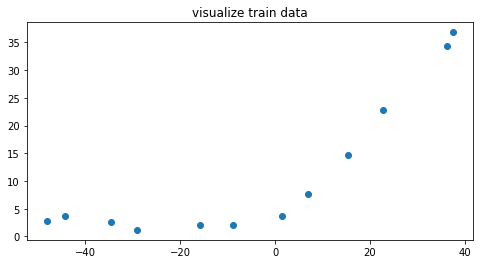

In [10]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.scatter(x=train_x, y=train_y)
plt.title('visualize train data')
plt.show()

In [7]:
def cost(theta, X, Y):
    theta[0]=theta[0]+1                            #不正则的时候，有 theta0=1
    inner= np.power((X @ theta)-Y,2)
    return np.sum(inner)/(2*len(X))

def regularize_cost(theta, X, Y,fi=1):
    theta[0]=theta[0]-1                          #正则的时候， theta0=0 !!!!!
    theta=theta.reshape([X.shape[1],1])  
    third=fi*np.power(theta,2).sum()/(2*len(X))
    return cost(theta, X, Y)+third

In [4]:
def gradient(theta, X, Y):
    theta[0]=theta[0]+1
    return ((1/len(X)) * X.T @ (X @ theta -Y)) #下降一步的值

def regularize_gradient(theta, X, Y,fi=1):
    theta[0]=theta[0]-1
    theta=theta.reshape([X.shape[1],1])
    regularize_num= (fi/len(X)) * theta
    return  (gradient(theta, X, Y) + regularize_num).reshape(X.shape[1]) #矩阵加法，每一项加一个

In [5]:
## process data, insert x0=1 !!
train_x=np.insert(train_x,0,values=1,axis=1)
theta = np.ones(2)

In [19]:
print(regularize_gradient(theta, train_x, train_y).reshape(2))
print(regularize_cost(theta, train_x, train_y))

[-15.30301567 598.25074417]
303.9931922202643


In [4]:
def linear_regression(X,Y , fi):
    Theta = np.ones(X.shape[1])
    res = opt.minimize(fun=regularize_cost, x0=Theta,
                      args=(X, Y,fi), method='TNC',
                      jac=regularize_gradient,
                      options={'disp': True})
    return res

In [21]:
result=linear_regression(train_x,train_y , fi=0)
result

     fun: 22.373906495108923
     jac: array([ 1.23341592e-07, -4.33699456e-07])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 9
     nit: 4
  status: 1
 success: True
       x: array([13.08790364,  0.36777923])

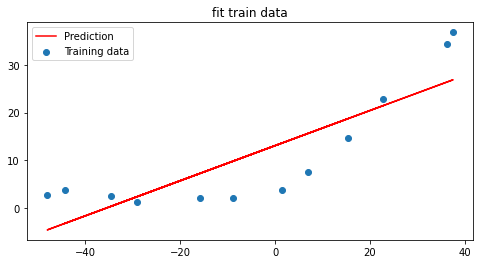

In [25]:
b = result['x'][0] 
a = result['x'][1]  
x = train_x[:, 1:]
fig, ax = plt.subplots(figsize=(8,4))
ax.scatter(x, train_y, label='Training data')
ax.plot(x, a*x+b, label='Prediction', c='r')
plt.title('fit train data')
ax.legend(loc='best')
plt.show()

### 1. plot learning curve--change M 

In [26]:
## process data, insert x0=1 !!
test_x,cv_x=np.insert(train_x,0,values=1,axis=1),np.insert(cv_x,0,values=1,axis=1)

In [29]:
M = len(train_x) ; train_cost, cv_cost=[],[]
for i in range(1, M+1):
    result = linear_regression(train_x[:i, :],train_y[:i], fi=0)
    train_error = regularize_cost(result['x'], train_x[:i, :], train_y[:i], fi=0)
    cv_error = regularize_cost(result['x'], cv_x, cv_y, fi=0)
    
    train_cost.append(train_error)
    cv_cost.append(cv_error)


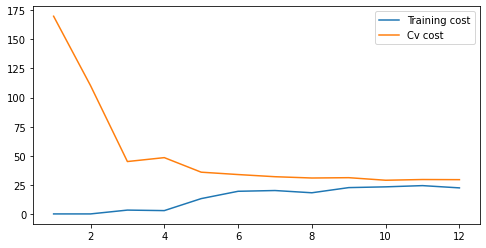

In [31]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(np.arange(1, M+1), train_cost, label='Training cost')
ax.plot(np.arange(1, M+1), cv_cost, label='Cv cost')
ax.legend(loc='best')
plt.show()

##### from learning curve, we see model is high bias and underfit !!!

### 2. plot learning curve---change degree of x (x^1,x^2,,,x^p )

In [5]:
data_2=sio.loadmat('/Users/yangguangqiang/Music/career-2021/ML-startup/吴恩达/ML-homework-main/ex5-bias vs variance/ex5data1.mat')
train_x=data_2['X']
train_y=data_2['y']
test_x=data_2['Xtest']
test_y=data_2['ytest']
cv_x=data_2['Xval']
cv_y=data_2['yval']

In [6]:
def standard_data(df):
    return df.apply(lambda col: (col - col.mean()) / col.std())
    # df = (df - df.mean()) / data.std() 

In [7]:
def poly_features(x, power, as_ndarray=False):
    data = {'f{}'.format(i): np.power(x, i) for i in range(1, power+1)}
    df = pd.DataFrame(data)
    
    return df.values if as_ndarray else df

In [8]:
def prepare_poly_data(*args, power):
    def prepare(x):
        df = poly_features(x.reshape(x.shape[0]), power)
        ndarr = standard_data(df).values          #标准化数据
#         ndarr = ((df - df.mean()) / df.std()).values
        return np.insert(ndarr, 0, values=1 , axis=1)  # x0 设置为 1
    
    return [prepare(x) for x in args][0]

In [35]:
poly_features(data_2['X'].reshape(12),power=4)    #需要 reshape 成一维的 array ！！！

,f1,f2,f3,f4
0,-15.936758,253.980260,-4047.621971,6.450597e+04
1,-29.152979,849.896197,-24777.006175,7.223235e+05
2,36.189549,1309.683430,47396.852168,1.715271e+06
3,37.492187,1405.664111,52701.422173,1.975892e+06
4,-48.058829,2309.651088,-110999.127750,5.334488e+06
5,-8.941458,79.949670,-714.866612,6.391950e+03
6,15.307793,234.328523,3587.052500,5.490986e+04
7,-34.706266,1204.524887,-41804.560890,1.450880e+06
8,1.389154,1.929750,2.680720,3.723935e+00
9,-44.383760,1969.918139,-87432.373590,3.880577e+06


In [42]:
prepare_poly_data(train_x, power=3)

array([[ 1.00000000e+00, -3.62140776e-01, -7.55086688e-01,
         1.82225876e-01],
       [ 1.00000000e+00, -8.03204845e-01,  1.25825266e-03,
        -2.47936991e-01],
       [ 1.00000000e+00,  1.37746700e+00,  5.84826715e-01,
         1.24976856e+00],
       [ 1.00000000e+00,  1.42093988e+00,  7.06646754e-01,
         1.35984559e+00],
       [ 1.00000000e+00, -1.43414853e+00,  1.85399982e+00,
        -2.03716308e+00],
       [ 1.00000000e+00, -1.28687086e-01, -9.75968776e-01,
         2.51385075e-01],
       [ 1.00000000e+00,  6.80581552e-01, -7.80028951e-01,
         3.40655738e-01],
       [ 1.00000000e+00, -9.88534310e-01,  4.51358004e-01,
        -6.01281871e-01],
       [ 1.00000000e+00,  2.16075753e-01, -1.07499276e+00,
         2.66275156e-01],
       [ 1.00000000e+00, -1.31150068e+00,  1.42280595e+00,
        -1.54812094e+00],
       [ 1.00000000e+00,  4.03776736e-01, -1.01501039e+00,
         2.73378511e-01],
       [ 1.00000000e+00,  9.29375305e-01, -4.19807932e-01,
      

In [36]:
def plot_learning_curve(X,Y,cv_X,cv_Y, fi,max_power):
    train_cost, cv_cost = [], []
    
    for i in range(1, max_power+1):
        temp_X=prepare_poly_data(X, power=i)
        cv_temp_X=prepare_poly_data(cv_X, power=i)
        
        temp_result = linear_regression(temp_X,Y, fi=fi)
    
        train_error = regularize_cost(temp_result.x, temp_X, Y, fi=0)
        cv_error = regularize_cost(temp_result.x, cv_temp_X, cv_Y, fi=0)
        
        train_cost.append(train_error)
        cv_cost.append(cv_error)
        
    fig, ax = plt.subplots(figsize=(max_power/1.5,4))
    ax.plot(np.arange(1, max_power+1), train_cost, label='Train cost')
    ax.plot(np.arange(1, max_power+1), cv_cost, label='Cv cost')
    ax.legend(loc='best', title=r'$\lambda={}$'.format(fi) )
    plt.xlabel("Degree")
    plt.ylabel("Error")
    plt.title(' error VS changing x^p ')

    plt.show()

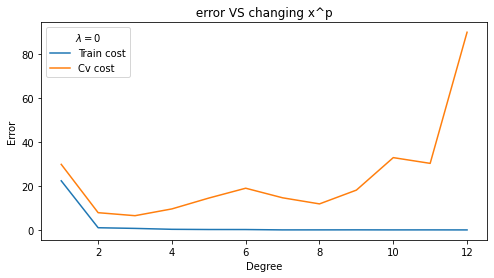

In [39]:
plot_learning_curve(train_x,train_y,cv_x,cv_y, fi=0,max_power=12)

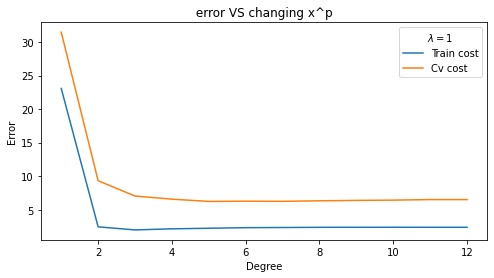

In [40]:
plot_learning_curve(train_x,train_y,cv_x,cv_y, fi=1,max_power=12)

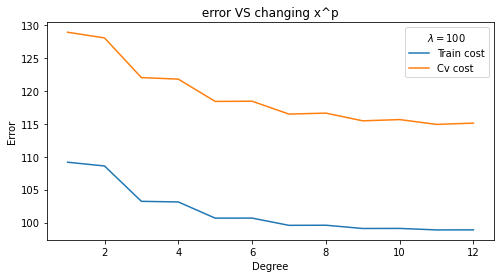

In [41]:
plot_learning_curve(train_x,train_y,cv_x,cv_y, fi=100,max_power=12)

### 3. plot learning curve---change lamanda 

In [28]:
def plot_lam_curve(X,Y,cv_X,cv_Y,test_X,test_Y,fi_list,power_num):
    train_cost, cv_cost , test_cost= [], [] ,[]
    X=prepare_poly_data(X, power=power_num)
    cv_X=prepare_poly_data(cv_X, power=power_num)
    test_X=prepare_poly_data(test_X, power=power_num)
    for j in fi_list:        
        temp_result = linear_regression(X,Y, fi=j)
        
        train_error = regularize_cost(temp_result.x, X, Y, fi=0)
        cv_error = regularize_cost(temp_result.x, cv_X, cv_Y, fi=0)
        test_error = regularize_cost(temp_result.x, test_X, test_Y, fi=0)
        
        train_cost.append(train_error)
        cv_cost.append(cv_error)
        test_cost.append(test_error)
        
    fig, ax = plt.subplots(figsize=(14/1.5,4))
    ax.plot(fi_list, train_cost, label='Train cost')
    ax.plot(fi_list, cv_cost, label='Cv cost')
    ax.plot(fi_list, test_cost, label='Test cost')
    ax.legend(loc='best')
    plt.xlabel("learning rate")
    plt.ylabel("Error")
    plt.title(' error VS changing learning rate ')
    plt.show()

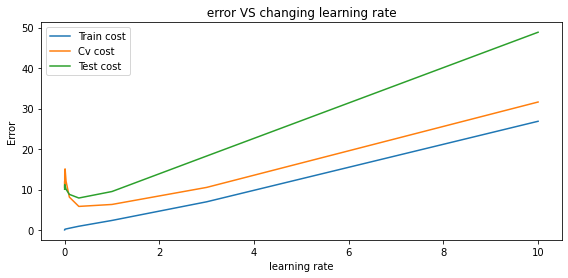

In [33]:
plot_lam_curve(train_x,train_y,cv_x,cv_y,test_x,test_y,
               [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10],8)